In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_btc = pd.read_csv('BTCUSD_1m_btc_usd_60.csv')
df_eth = pd.read_csv('ETHUSD_1m_eth_usd_60.csv')
df_ltc = pd.read_csv('LTCUSD_1m_ltc_usd_60.csv')
df_xrp = pd.read_csv('XRPUSD_1m_xrp_usd_60.csv')

In [27]:
def plot_price_volume(df, title, ax):
    df = df[df['time'].str.endswith('00:00:00')]
    df = df.copy()
    df['time'] = pd.to_datetime(df['time'])
    df['average_price'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)
    
    ax.plot(df['time'], df['average_price'], label='Average Price')
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.grid(ls = "--", lw = .5)
    ax.set_title(title)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    start_date = pd.to_datetime('2021-09-01')
    ax.set_xlim(df['time'].min(), df['time'].max())
    ax.tick_params(axis='y', labelcolor='C0')
    
    ax2 = ax.twinx()
    ax2.spines[['left', 'right', 'top']].set_visible(False)
    ax2.plot(df['time'], df['Volume'], color='gold', label='Volume')
    ax2.tick_params(axis='y', labelcolor='gold')
    
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax.legend(lines, labels, loc='upper right')
    
    plt.subplots_adjust(hspace=0.5) 

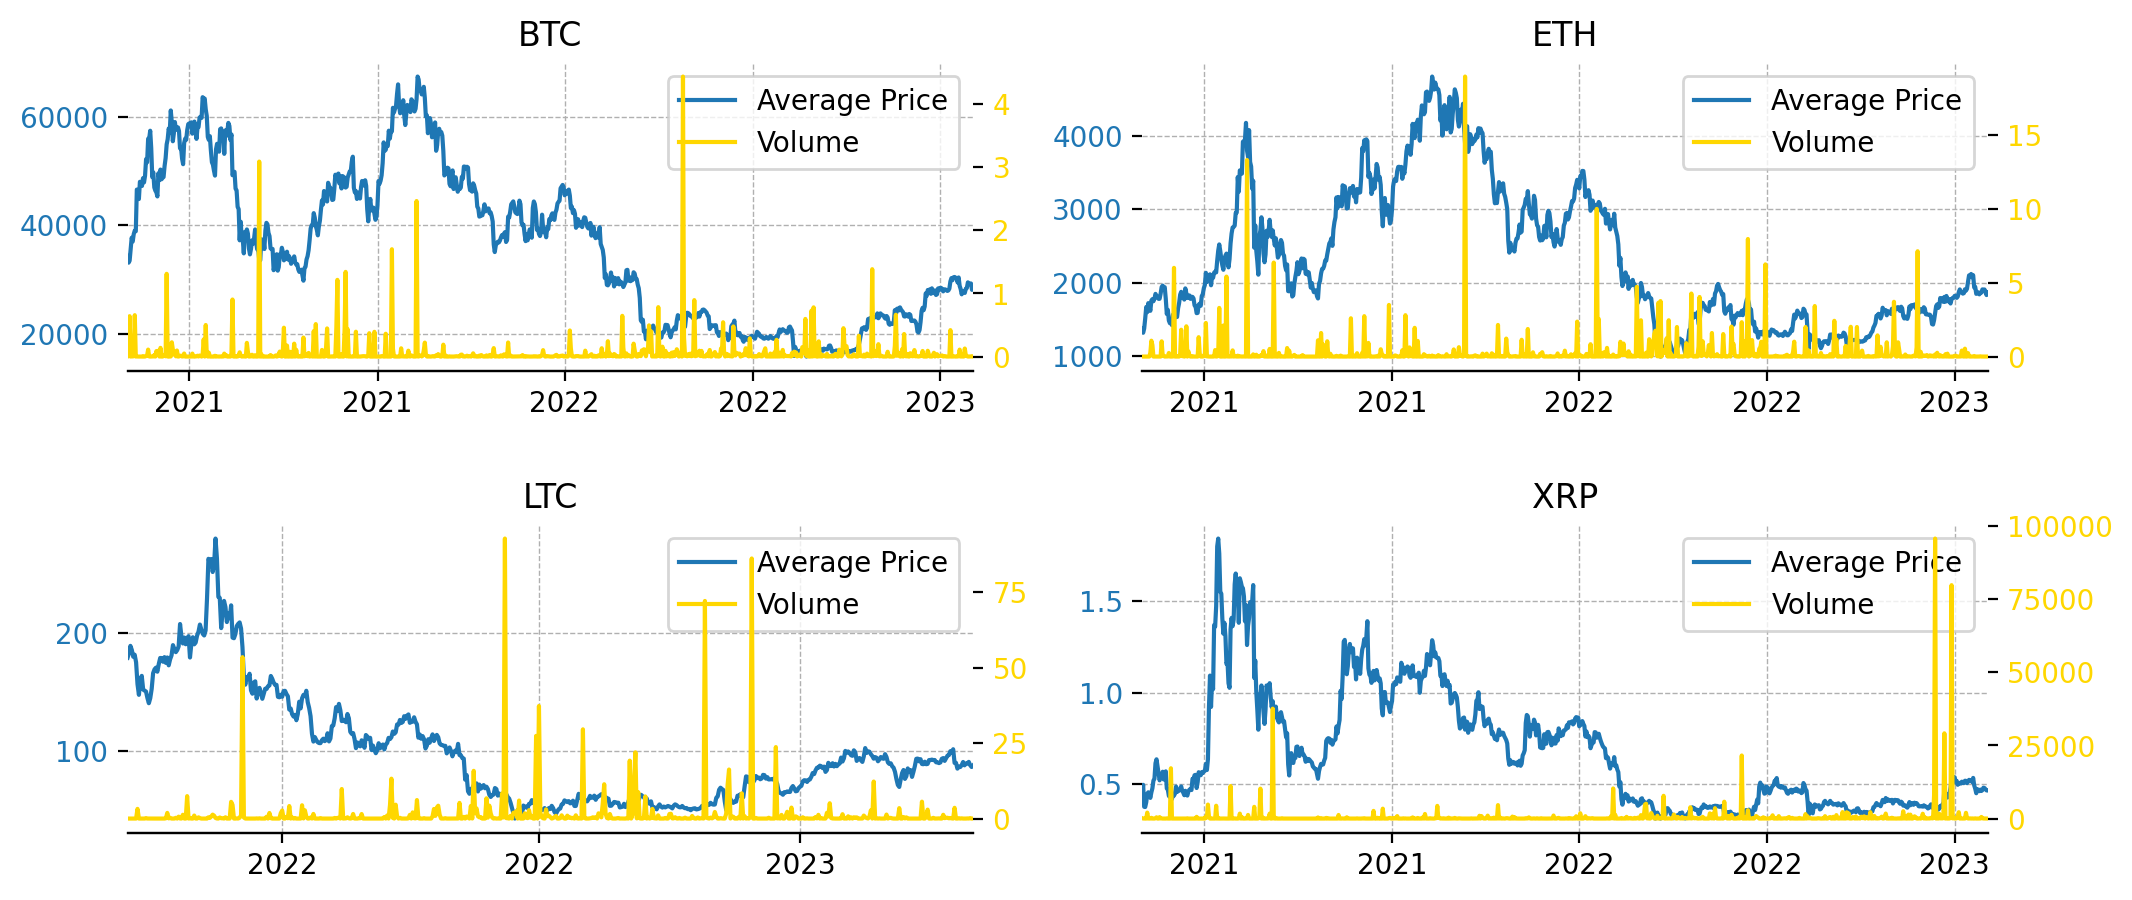

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5), dpi=200)
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
plot_price_volume(df_btc, 'BTC', ax1)
plot_price_volume(df_eth, 'ETH', ax2)
plot_price_volume(df_ltc, 'LTC', ax3)
plot_price_volume(df_xrp, 'XRP', ax4)
plt.show()